# Guided Capstone - Big Mountain Resort

This notebook is a concatenation of all of the code to related to the Big Mountain Guided Capstone Project in one notebook.

In [1]:
# Load necessary packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
%matplotlib inline

In [2]:
os.getcwd()

'/Users/ktregier/Desktop/Springboard/Unit 6/Capstone1/Final'

# Problem Identification

How can Big Mountain Resort raise an additional $1.68 million in revenue to cover the operating costs of the new chairlift and maintain the current profit margin?

# Data Wrangling
## Data Collection

In [3]:
# Define the path of the data file
filepath="/Users/ktregier/Desktop/Springboard/Unit 6/Capstone1/Final/data/updated_ski_data.csv"

# Load the data into a pandas dataframe
df = pd.read_csv(filepath, header=0)
df.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


## Data Definition
### Column Names

In [4]:
# Print column names for entire dataframe. 
# See project documentation for description of column contents
print(df.columns)

Index(['Name', 'Region', 'state', 'summit_elev', 'vertical_drop', 'base_elev',
       'trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple',
       'double', 'surface', 'total_chairs', 'Runs', 'TerrainParks',
       'LongestRun_mi', 'SkiableTerrain_ac', 'Snow Making_ac',
       'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekday',
       'AdultWeekend', 'projectedDaysOpen', 'NightSkiing_ac'],
      dtype='object')


### Data Types

In [5]:
# Review types of different columns - make sure data type is properly loaded
print(df.dtypes)

Name                  object
Region                object
state                 object
summit_elev            int64
vertical_drop          int64
base_elev              int64
trams                  int64
fastEight            float64
fastSixes              int64
fastQuads              int64
quad                   int64
triple                 int64
double                 int64
surface                int64
total_chairs           int64
Runs                 float64
TerrainParks         float64
LongestRun_mi        float64
SkiableTerrain_ac    float64
Snow Making_ac       float64
daysOpenLastYear     float64
yearsOpen            float64
averageSnowfall      float64
AdultWeekday         float64
AdultWeekend         float64
projectedDaysOpen    float64
NightSkiing_ac       float64
dtype: object


In [6]:
# Review counts of non-null values per column
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

### Count of unique values of codes

In [7]:
# Print count of unique values for every column, regardless of type
print(df.nunique())

Name                 329
Region                38
state                 35
summit_elev          266
vertical_drop        193
base_elev            244
trams                  5
fastEight              2
fastSixes              7
fastQuads             14
quad                   7
triple                 9
double                10
surface               12
total_chairs          31
Runs                 110
TerrainParks          11
LongestRun_mi         42
SkiableTerrain_ac    193
Snow Making_ac       143
daysOpenLastYear     111
yearsOpen             72
averageSnowfall      107
AdultWeekday          83
AdultWeekend          81
projectedDaysOpen     90
NightSkiing_ac        78
dtype: int64


In [8]:
# Print percent of unique values per column. 
size = len(df.index) -1
df.nunique() / size * 100

Name                 100.000000
Region                11.550152
state                 10.638298
summit_elev           80.851064
vertical_drop         58.662614
base_elev             74.164134
trams                  1.519757
fastEight              0.607903
fastSixes              2.127660
fastQuads              4.255319
quad                   2.127660
triple                 2.735562
double                 3.039514
surface                3.647416
total_chairs           9.422492
Runs                  33.434650
TerrainParks           3.343465
LongestRun_mi         12.765957
SkiableTerrain_ac     58.662614
Snow Making_ac        43.465046
daysOpenLastYear      33.738602
yearsOpen             21.884498
averageSnowfall       32.522796
AdultWeekday          25.227964
AdultWeekend          24.620061
projectedDaysOpen     27.355623
NightSkiing_ac        23.708207
dtype: float64

In [9]:
# Use value_counts() method to look at values in categorical columns (Region and state)
print("Regions")
df.Region.value_counts()

Regions


New York               33
Michigan               29
Colorado               22
Sierra Nevada          22
Pennsylvania           19
Wisconsin              16
New Hampshire          16
Vermont                15
Minnesota              14
Idaho                  12
Montana                12
Massachusetts          11
Washington             10
New Mexico              9
Maine                   9
Wyoming                 8
Utah                    7
Oregon                  6
Salt Lake City          6
North Carolina          6
Connecticut             5
Ohio                    5
West Virginia           4
Virginia                4
Illinois                4
Mt. Hood                4
Iowa                    3
Alaska                  3
New Jersey              2
Nevada                  2
Missouri                2
Indiana                 2
Arizona                 2
South Dakota            2
Maryland                1
Tennessee               1
Rhode Island            1
Northern California     1
Name: Region

In [10]:
print("States")
df.state.value_counts()

States


New York          33
Michigan          29
Colorado          22
California        21
Pennsylvania      19
Wisconsin         16
New Hampshire     16
Vermont           15
Minnesota         14
Utah              13
Montana           12
Idaho             12
Massachusetts     11
Oregon            10
Washington        10
Maine              9
New Mexico         9
Wyoming            8
North Carolina     6
Connecticut        5
Ohio               5
Nevada             4
West Virginia      4
Virginia           4
Illinois           4
Iowa               3
Alaska             3
New Jersey         2
South Dakota       2
Missouri           2
Indiana            2
Arizona            2
Maryland           1
Rhode Island       1
Tennessee          1
Name: state, dtype: int64

### Range of values per column

In [11]:
# Print the range of values per column using the aggregate function and transpose the result
df.agg(['min', 'max']).T

,min,max
Name,49 Degrees North,Yosemite Ski & Snowboard Area
Region,Alaska,Wyoming
state,Alaska,Wyoming
summit_elev,315,13487
vertical_drop,60,4425
base_elev,70,10800
trams,0,4
fastEight,0,1
fastSixes,0,6
fastQuads,0,15


In [12]:
# Review the numerica dataset's summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


## Data Cleaning
### Handle the missing and NA values

In [13]:
nas=pd.DataFrame(df.isnull().sum().sort_values(ascending=False)/len(df),columns = ['percent'])
pos = nas['percent'] > 0
nas[pos]

,percent
fastEight,0.503030
NightSkiing_ac,0.433333
AdultWeekday,0.163636
AdultWeekend,0.154545
daysOpenLastYear,0.154545
TerrainParks,0.154545
projectedDaysOpen,0.142424
Snow Making_ac,0.139394
averageSnowfall,0.042424
LongestRun_mi,0.015152


In [14]:
# Determine appropriate values for the fastEight column by comparing sum of individual
# chairlift columns with total_chairs column
chair_total = df.loc[:, 'trams':'surface'].sum(axis=1)
chair_diff = df[df['total_chairs'] != chair_total]
print(chair_diff)

Empty DataFrame
Columns: [Name, Region, state, summit_elev, vertical_drop, base_elev, trams, fastEight, fastSixes, fastQuads, quad, triple, double, surface, total_chairs, Runs, TerrainParks, LongestRun_mi, SkiableTerrain_ac, Snow Making_ac, daysOpenLastYear, yearsOpen, averageSnowfall, AdultWeekday, AdultWeekend, projectedDaysOpen, NightSkiing_ac]
Index: []

[0 rows x 27 columns]


In [15]:
# Replace NaNs in appropriate columns with zero
df['fastEight'].fillna(value=0, inplace=True)
df['NightSkiing_ac'].fillna(value=0, inplace=True)
df['TerrainParks'].fillna(value=0, inplace=True)
df['Snow Making_ac'].fillna(value=0, inplace=True)

In [16]:
# Replace NaNs in appropriate columns with data mean
df['AdultWeekday'].fillna((df['AdultWeekday'].mean()), inplace=True)
df['AdultWeekend'].fillna((df['AdultWeekend'].mean()), inplace=True)
df['daysOpenLastYear'].fillna((df['daysOpenLastYear'].mean()), inplace=True)
df['projectedDaysOpen'].fillna((df['projectedDaysOpen'].mean()), inplace=True)
df['averageSnowfall'].fillna((df['averageSnowfall'].mean()), inplace=True)
df['LongestRun_mi'].fillna((df['LongestRun_mi'].mean()), inplace=True)
df['Runs'].fillna((df['Runs'].mean()), inplace=True)
df['SkiableTerrain_ac'].fillna((df['SkiableTerrain_ac'].mean()), inplace=True)
df['yearsOpen'].fillna((df['yearsOpen'].mean()), inplace=True)

In [17]:
# Doublecheck for NaN values - there shouldn't be any 
df.isnull().sum()

Name                 0
Region               0
state                0
summit_elev          0
vertical_drop        0
base_elev            0
trams                0
fastEight            0
fastSixes            0
fastQuads            0
quad                 0
triple               0
double               0
surface              0
total_chairs         0
Runs                 0
TerrainParks         0
LongestRun_mi        0
SkiableTerrain_ac    0
Snow Making_ac       0
daysOpenLastYear     0
yearsOpen            0
averageSnowfall      0
AdultWeekday         0
AdultWeekend         0
projectedDaysOpen    0
NightSkiing_ac       0
dtype: int64

In [18]:
# Look for duplicate rows
duplicateRowsDF = df[df.duplicated()]
print(duplicateRowsDF)

Empty DataFrame
Columns: [Name, Region, state, summit_elev, vertical_drop, base_elev, trams, fastEight, fastSixes, fastQuads, quad, triple, double, surface, total_chairs, Runs, TerrainParks, LongestRun_mi, SkiableTerrain_ac, Snow Making_ac, daysOpenLastYear, yearsOpen, averageSnowfall, AdultWeekday, AdultWeekend, projectedDaysOpen, NightSkiing_ac]
Index: []

[0 rows x 27 columns]


In [19]:
# Export cleaned data to new .csv file, for future reference
outpath = "/Users/ktregier/Desktop/Springboard/Unit 6/Capstone1/Final/data/clean_ski_data.csv"
df.to_csv(outpath)

# Exploratory Data Analysis
## Build data profile tables and plots

In [20]:
# Print summary stats table, transposed to fit screen
df.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.500000,7806.000000,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.500000,1800.000000,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.500000,6325.250000,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.000000,0.000000,4.0
fastEight,330.0,0.003030,0.055048,0.0,0.00,0.000000,0.000000,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.000000,0.000000,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.000000,1.000000,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.000000,1.000000,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.000000,2.000000,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.000000,3.000000,14.0


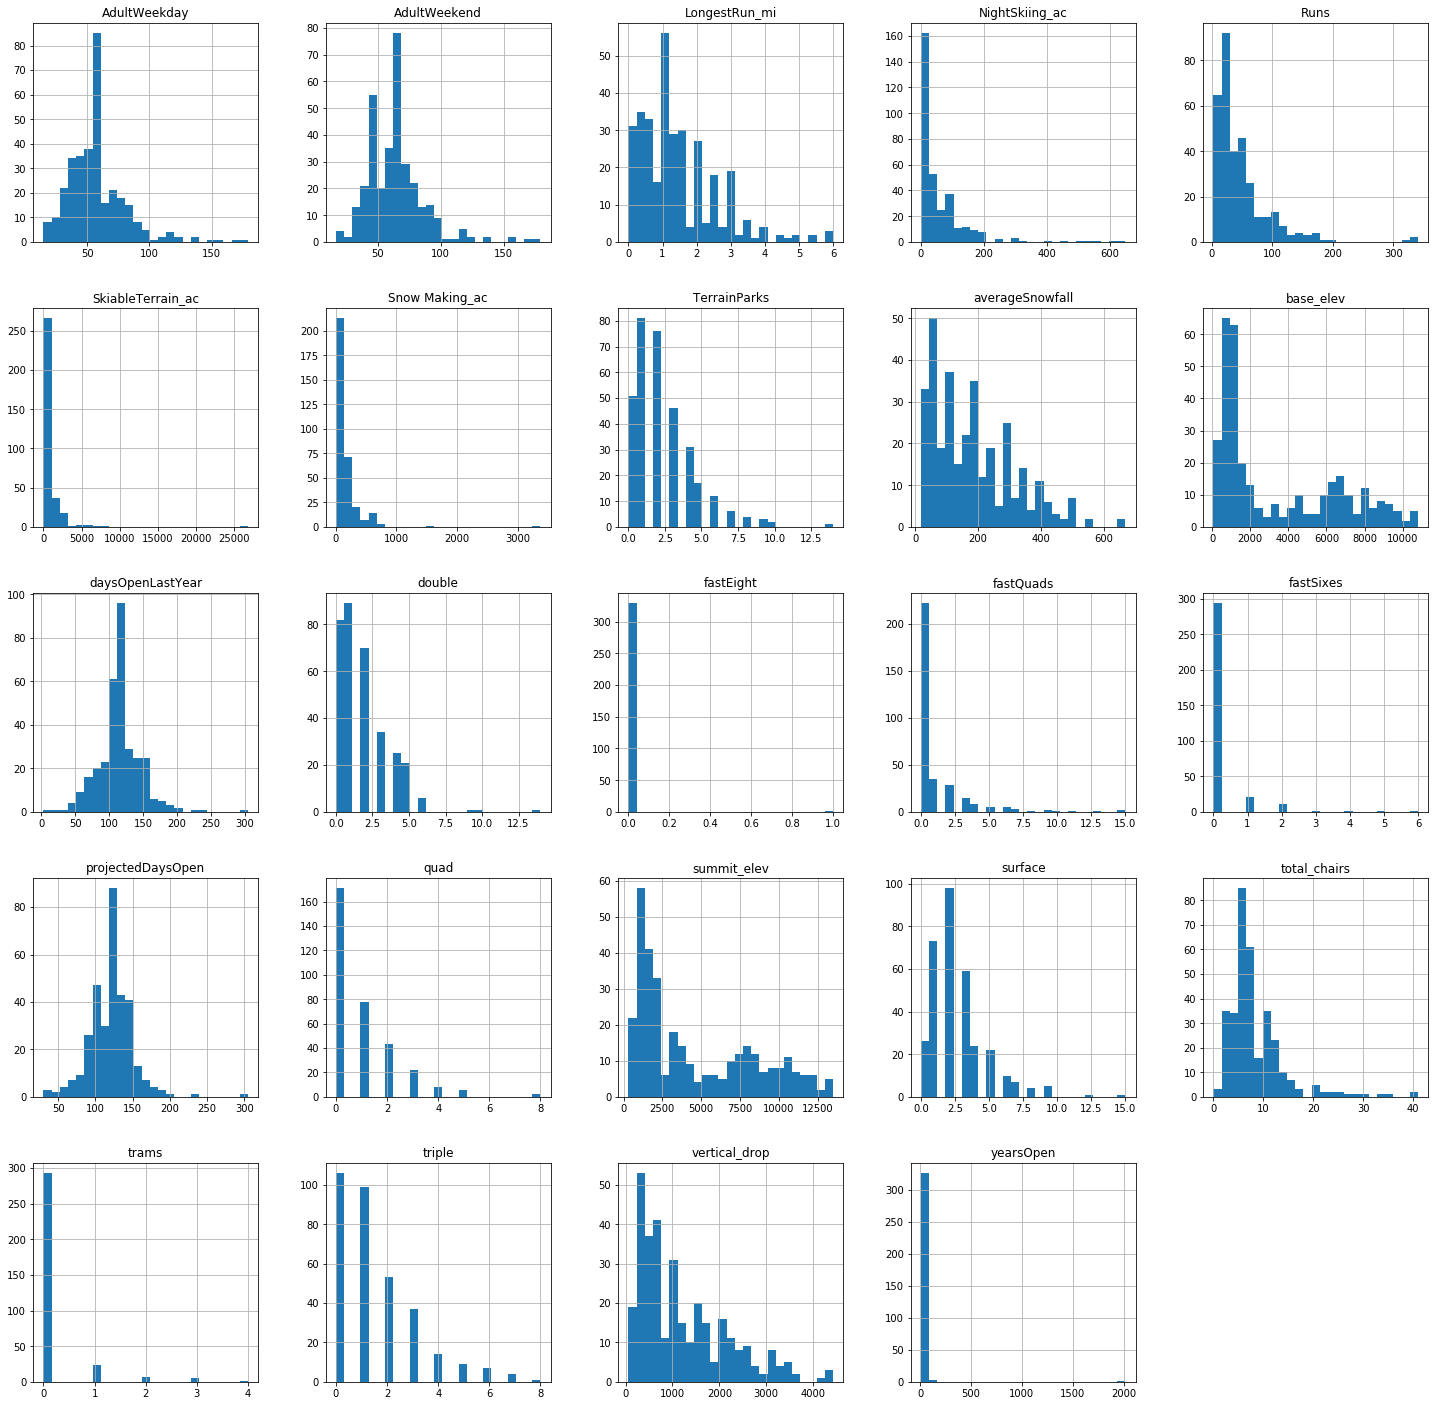

In [21]:
# Plot histograms for numeric data.
hist = df.hist(bins=25, figsize=(25,25))

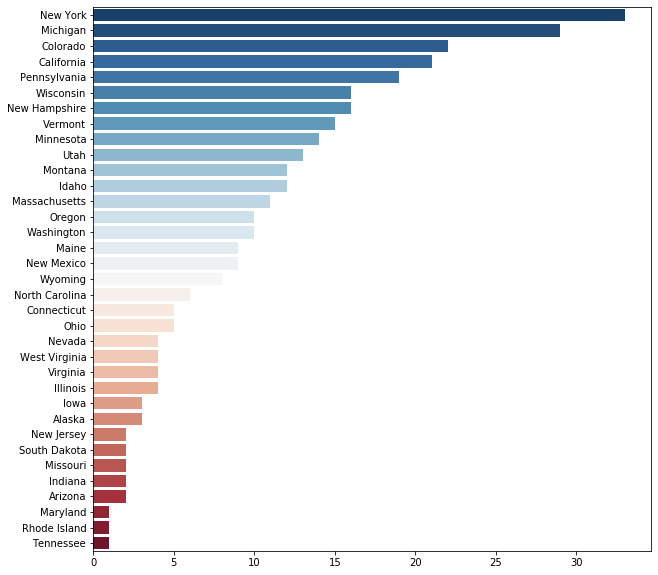

In [22]:
# Create a barplot for the state data
f, ax = plt.subplots(figsize=(10, 10))
x = pd.DataFrame(df.state.value_counts())
names = list(x.index)
values = list(x.state)
sns.barplot(x=values, y=names, palette="RdBu_r")

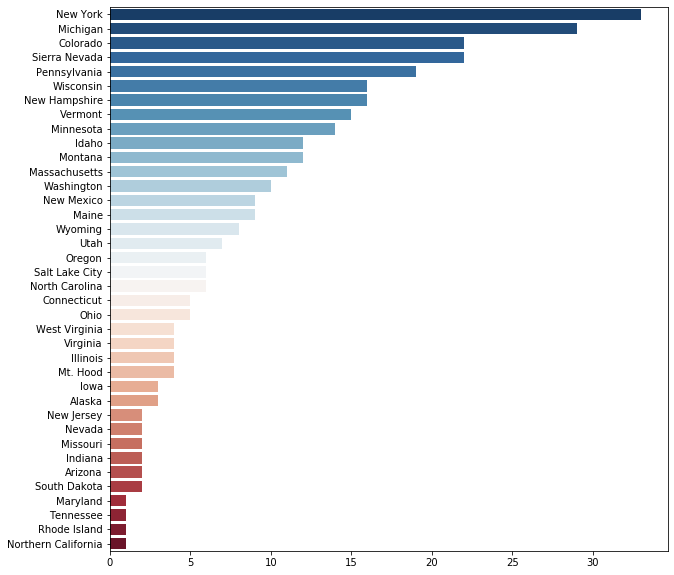

In [23]:
# Create a barplot for the Region data
f, ax = plt.subplots(figsize=(10, 10))
x = pd.DataFrame(df.Region.value_counts())
names = list(x.index)
values = list(x.Region)
sns.barplot(x=values, y=names, palette="RdBu_r")

In [24]:
# Drop Region column, since State and Region are nearly identical in this data
df2 = df.drop(columns="Region")

## Anomolies & Outliers

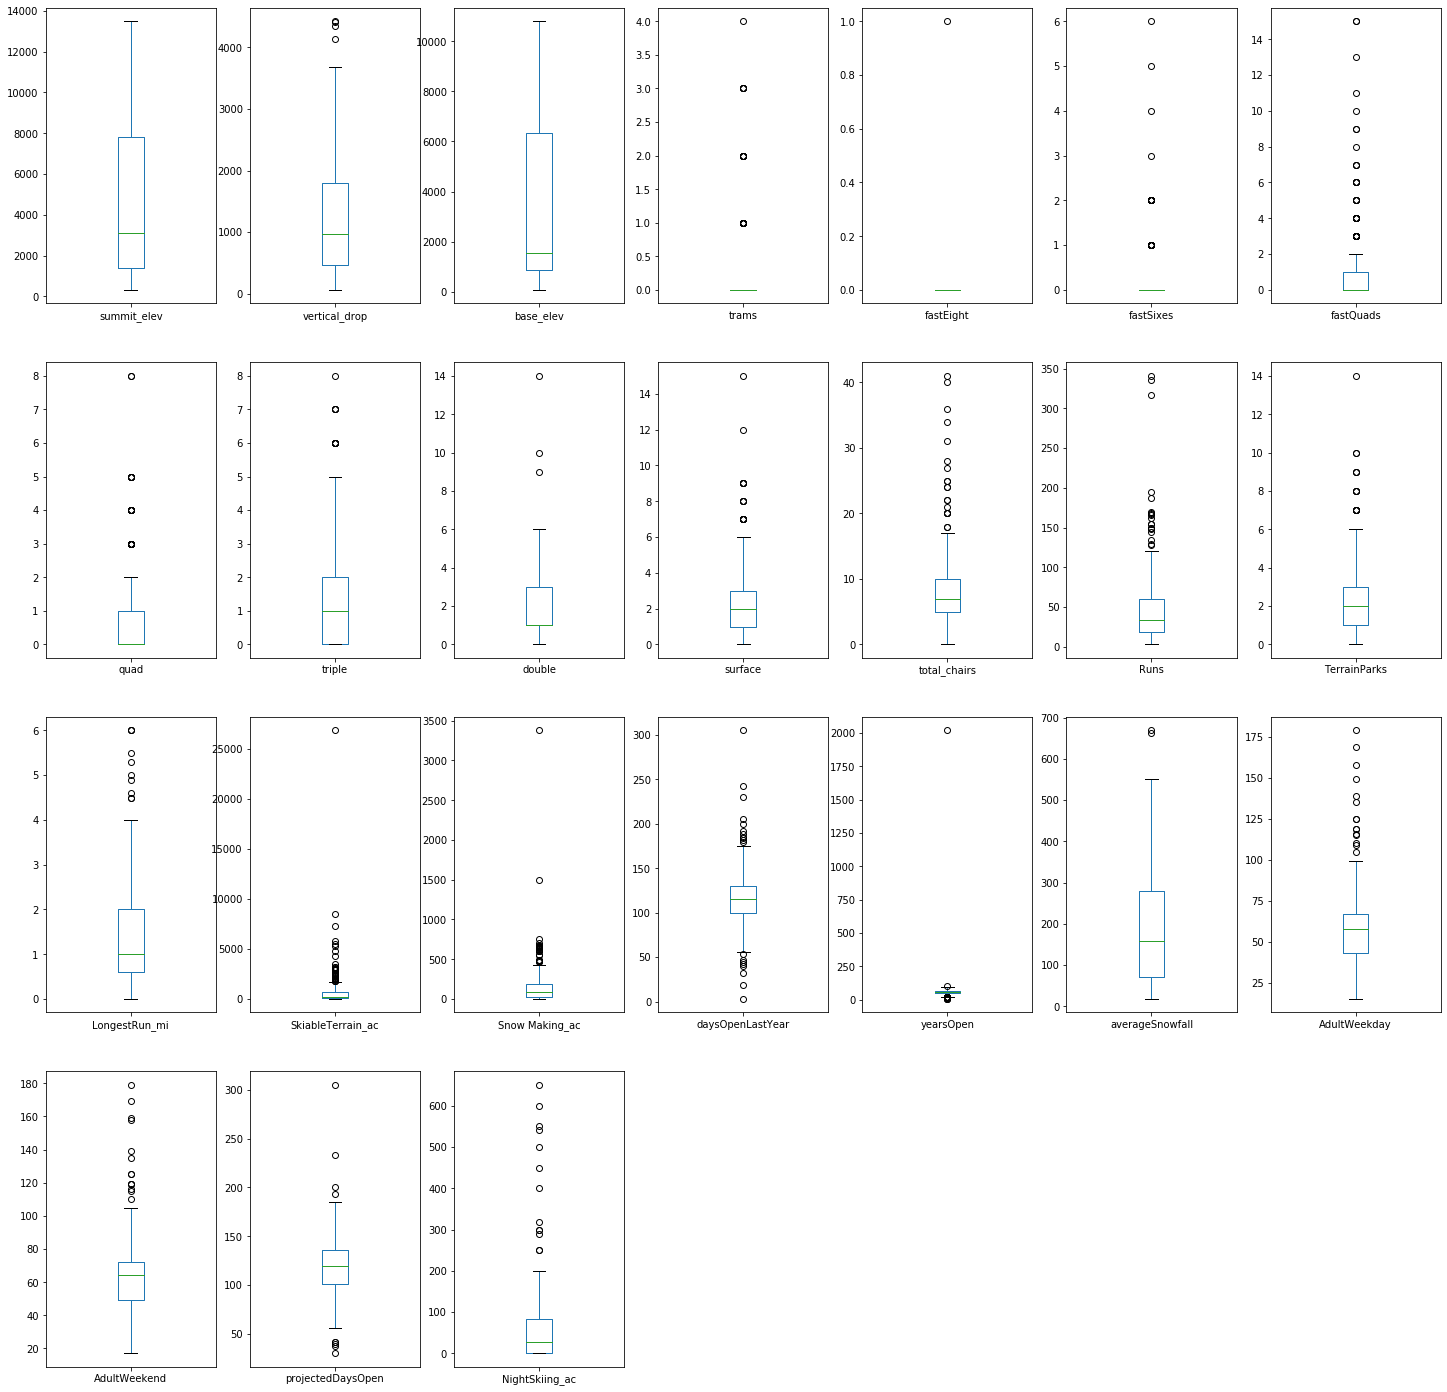

In [25]:
# Print boxplots for every column to  check for outliers and anomolies
df2.plot(kind="box", subplots=True, layout=(4,7), sharex=False, sharey=False, figsize=(25,25))
plt.show()

In [26]:
# Replace outlier in yearsOpen columm with "1"
df2.loc[115, 'yearsOpen'] = 1

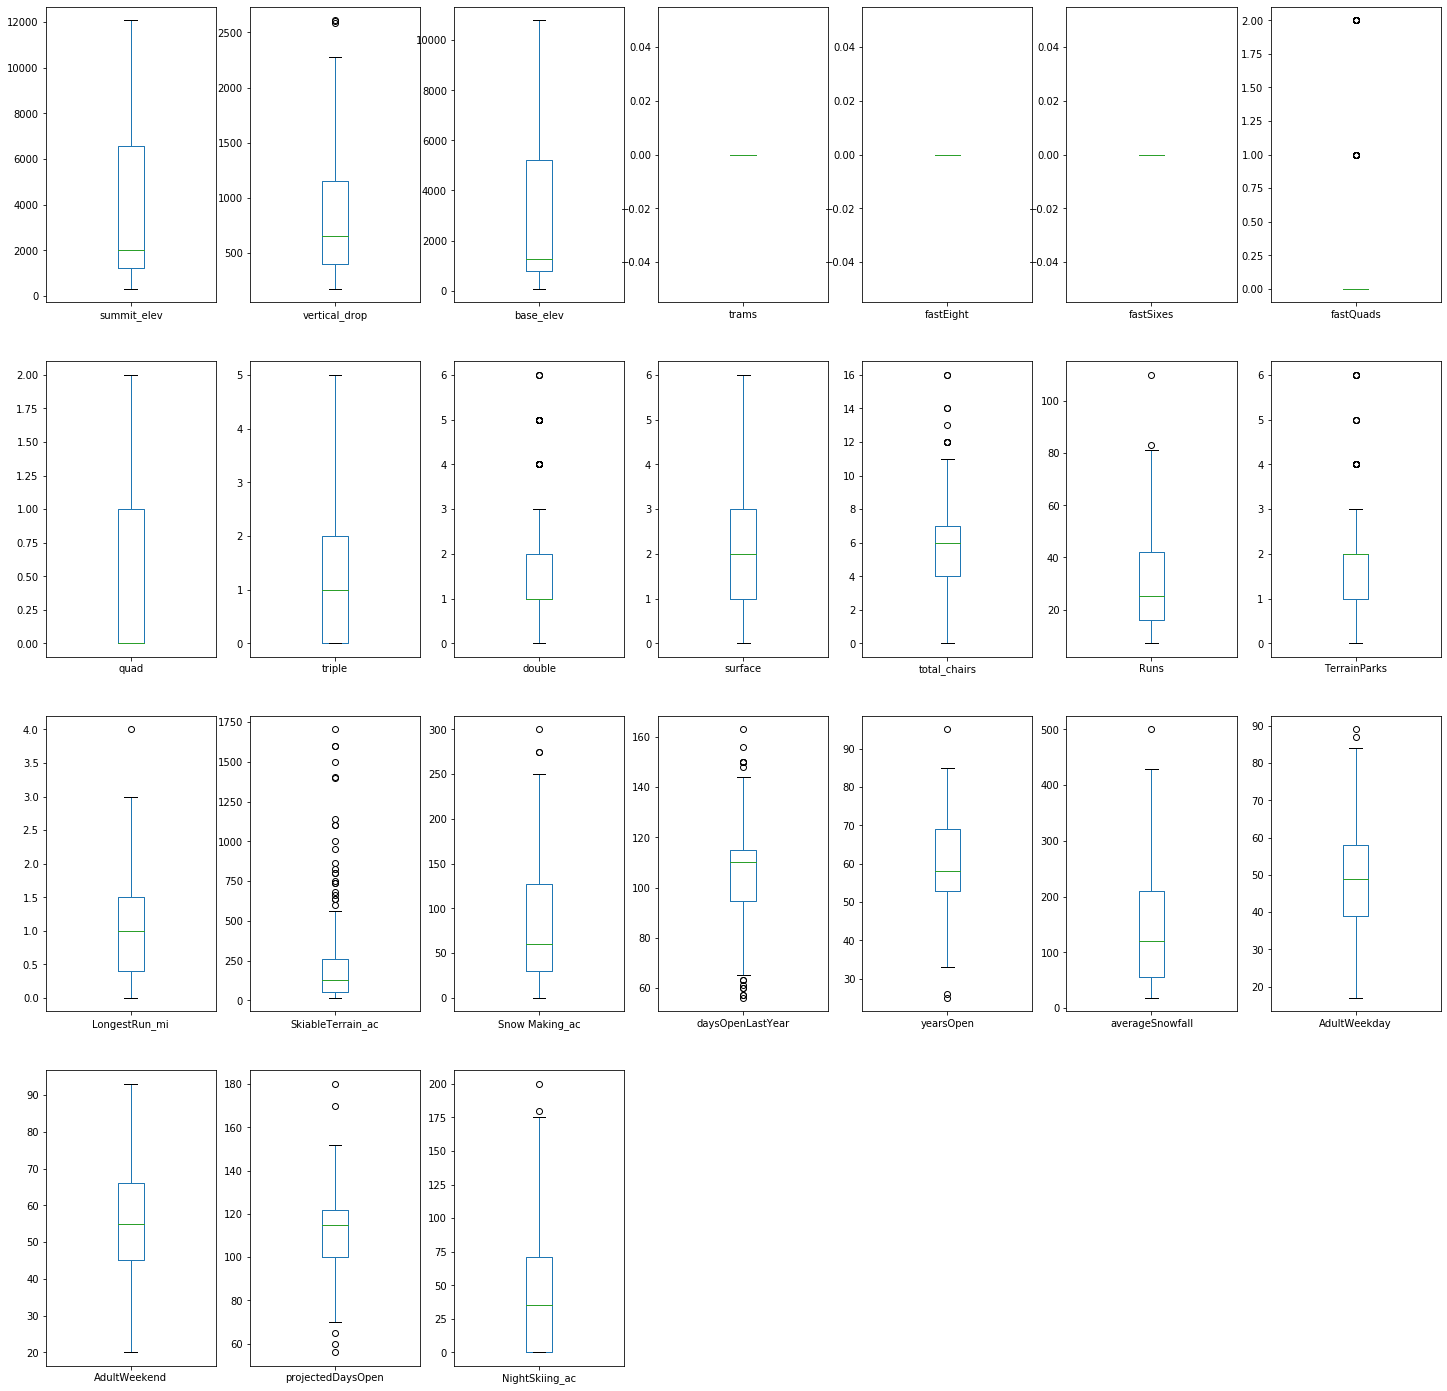

In [27]:
# Calculate Interquartile range
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1

# Make a variable called `dfno`, and assign it the value: df[~((df < (Q1 - 1.5 * IQR)) |(df> (Q3 + 1.5 * IQR))).any(axis=1)]. 
# This filters on our existing dataframe, picking out just those observations that are NOT outliers. 
dfno = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

# We now want to make a boxplot of this new dataframe dfno. 
#boxplot = dfno.boxplot(grid=False, vert=False,fontsize=15, figsize=(12,15))
dfno.plot(kind="box", subplots=True, layout=(4,7), sharex=False, sharey=False, figsize=(25,25))
plt.show()

In [28]:
# Print the shapes of our dataframes df and dfno to compare the number of observations in each. 
original = df2.shape
removed = dfno.shape
print("original : ", original, " , removed : " , removed)

original :  (330, 26)  , removed :  (175, 26)


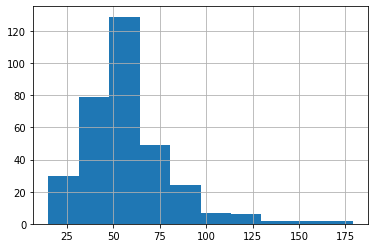

In [29]:
# Explore distributions of chosen response variables
os.getcwd()
# Make a histogram of the 'AdultWeekday' column of the df2 dataframe. 
df2['AdultWeekday'].hist()
plt.savefig('figures/WeekdayHist.png',bbox_inches='tight')

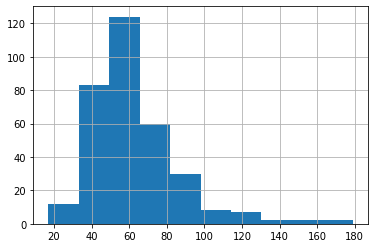

In [30]:
# Make a histogram of the 'AdultWeekend' column of the df2 dataframe. 
df2['AdultWeekend'].hist()
plt.savefig('figures/WeekendHist.png',bbox_inches='tight')

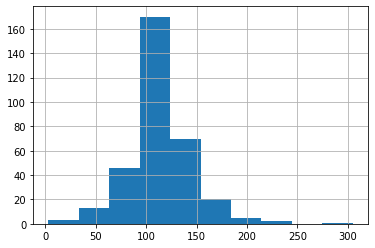

In [31]:
# Make a histogram of the 'daysOpenLastYear' column of the df2 dataframe. 
df2['daysOpenLastYear'].hist()
plt.savefig('figures/LastDaysOpenHist.png',bbox_inches='tight')

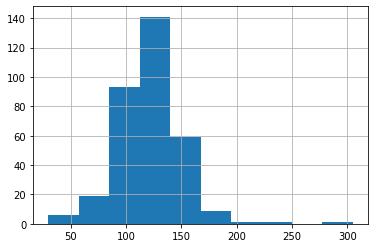

In [32]:
# Make a histogram of the 'projectdDaysOpen' column of the df2 dataframe. 
df2['projectedDaysOpen'].hist()
plt.savefig('figures/projecteDaysOpenHist.png',bbox_inches='tight')

### Explore data relationships

<Figure size 432x288 with 0 Axes>

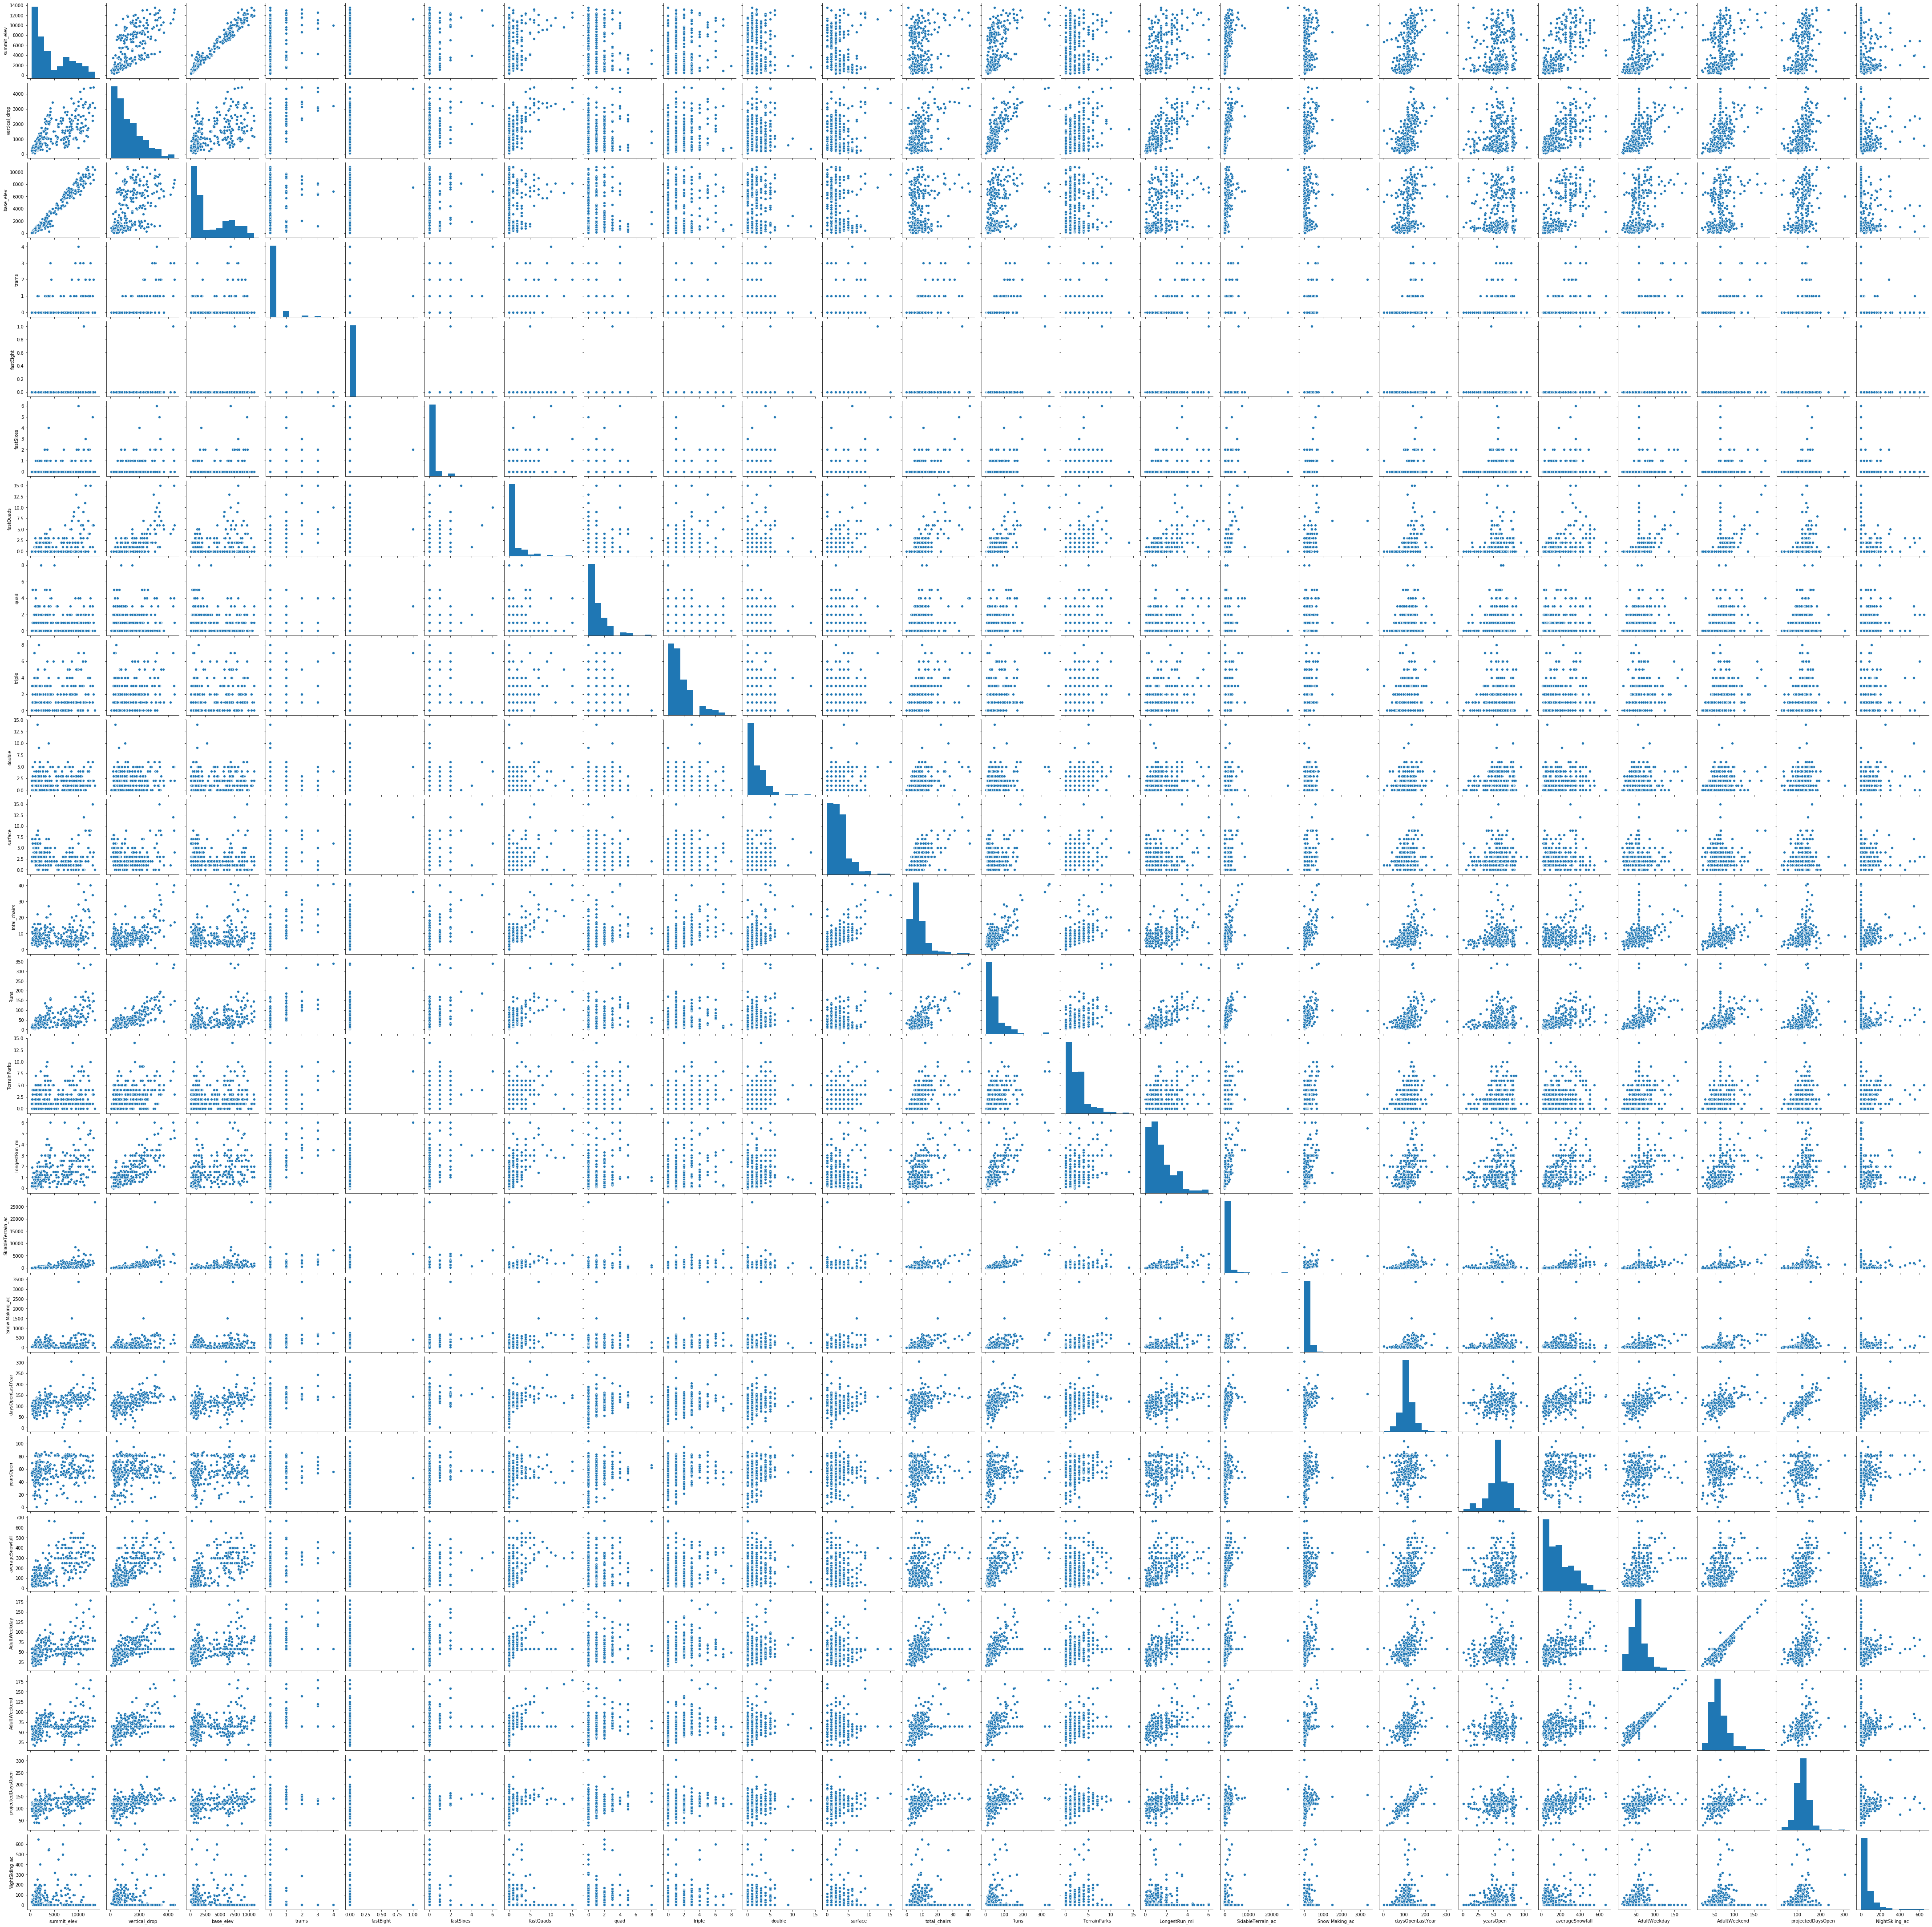

In [33]:
# Create pairplots (biplots)
plt.figure()
sns.pairplot(data=df2)
plt.show()

### Identification and creation of features
Create a Pearson correlation heatmap

In [34]:
# Calculate the correlation coefficients
corr = df2.corr()

# Plot the correlation coefficients
corr.round(2).style.background_gradient(cmap='coolwarm')

,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
summit_elev,1.000000,0.740000,0.980000,0.340000,0.100000,0.260000,0.450000,-0.010000,0.180000,0.110000,-0.040000,0.300000,0.570000,0.160000,0.530000,0.470000,0.240000,0.430000,0.160000,0.690000,0.470000,0.380000,0.400000,-0.160000
vertical_drop,0.740000,1.000000,0.590000,0.590000,0.180000,0.380000,0.680000,0.140000,0.260000,0.170000,0.090000,0.550000,0.800000,0.340000,0.760000,0.530000,0.430000,0.530000,0.150000,0.660000,0.630000,0.580000,0.510000,-0.070000
base_elev,0.980000,0.590000,1.000000,0.230000,0.070000,0.210000,0.340000,-0.060000,0.150000,0.080000,-0.070000,0.200000,0.450000,0.100000,0.410000,0.410000,0.170000,0.360000,0.150000,0.630000,0.380000,0.280000,0.330000,-0.180000
trams,0.340000,0.590000,0.230000,1.000000,0.080000,0.530000,0.660000,0.220000,0.270000,0.070000,0.270000,0.650000,0.690000,0.330000,0.570000,0.340000,0.550000,0.350000,0.050000,0.290000,0.410000,0.410000,0.210000,-0.100000
fastEight,0.100000,0.180000,0.070000,0.080000,1.000000,0.150000,0.100000,0.090000,0.190000,0.100000,0.250000,0.260000,0.320000,0.150000,0.220000,0.150000,0.060000,0.050000,-0.040000,0.090000,0.000000,0.000000,0.050000,-0.030000
fastSixes,0.260000,0.380000,0.210000,0.530000,0.150000,1.000000,0.440000,0.120000,0.270000,0.120000,0.370000,0.600000,0.550000,0.350000,0.370000,0.290000,0.430000,0.270000,0.040000,0.180000,0.220000,0.230000,0.200000,-0.070000
fastQuads,0.450000,0.680000,0.340000,0.660000,0.100000,0.440000,1.000000,0.150000,0.300000,0.100000,0.330000,0.760000,0.750000,0.430000,0.580000,0.390000,0.520000,0.450000,0.060000,0.400000,0.540000,0.530000,0.360000,-0.020000
quad,-0.010000,0.140000,-0.060000,0.220000,0.090000,0.120000,0.150000,1.000000,0.140000,-0.120000,0.120000,0.360000,0.300000,0.270000,0.200000,0.060000,0.220000,0.190000,0.070000,0.070000,0.250000,0.300000,0.200000,0.160000
triple,0.180000,0.260000,0.150000,0.270000,0.190000,0.270000,0.300000,0.140000,1.000000,-0.020000,0.180000,0.540000,0.370000,0.400000,0.260000,0.140000,0.340000,0.190000,0.110000,0.130000,0.270000,0.310000,0.160000,0.090000
double,0.110000,0.170000,0.080000,0.070000,0.100000,0.120000,0.100000,-0.120000,-0.020000,1.000000,0.090000,0.370000,0.240000,0.250000,0.150000,0.080000,0.100000,0.100000,0.160000,0.090000,0.120000,0.120000,0.110000,0.130000


In [35]:
# Step 1. Create a correlation matrix that excludes the response variables.
corr_matrix = df2.drop(['AdultWeekday','AdultWeekend','daysOpenLastYear','projectedDaysOpen'], axis=1).corr().abs()

# Step 2. Uncomment the following code to get the upper triangle of the correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Step 3. This code iterates through our columns and gets the index of any that have a correlation > 0.95
# Call the variable to_drop, get the columns of our 'upper' variable, make sure the threshold is 0.95.
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

In [36]:
# Let's see those features! 
print('Features selected to drop include:',to_drop)

Features selected to drop include: ['base_elev']


In [37]:
print('Reduced dataframe size: ',df2.drop(df2[to_drop], axis=1).shape)

Reduced dataframe size:  (330, 25)


In [38]:
# Now replace df2/dfno by the result of dropping the columns in the to_drop variable from it
df3 = df2.drop(df2[to_drop], axis=1)
df3.shape

(330, 25)

In [39]:
# Use K-means clustering to create clusters as a feature
df3.info()
x = df3.drop(['Name','state'], axis =1).values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   state              330 non-null    object 
 2   summit_elev        330 non-null    int64  
 3   vertical_drop      330 non-null    int64  
 4   trams              330 non-null    int64  
 5   fastEight          330 non-null    float64
 6   fastSixes          330 non-null    int64  
 7   fastQuads          330 non-null    int64  
 8   quad               330 non-null    int64  
 9   triple             330 non-null    int64  
 10  double             330 non-null    int64  
 11  surface            330 non-null    int64  
 12  total_chairs       330 non-null    int64  
 13  Runs               330 non-null    float64
 14  TerrainParks       330 non-null    float64
 15  LongestRun_mi      330 non-null    float64
 16  SkiableTerrain_ac  330 non

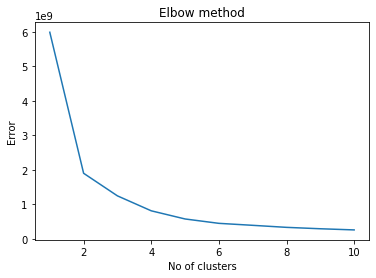

In [40]:
# Create Elbow plot to determine number of clusters
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

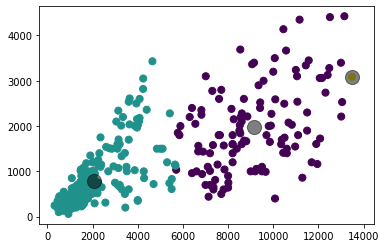

In [41]:
# Fit the kmeans algorith with the k parameter set to three and plot the results
kmeans3 = KMeans(n_clusters=3).fit(x)
y_kmeans3 = kmeans3.predict(x)
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans3, s=50, cmap='viridis')

centers = kmeans3.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [42]:
# Make a new column in your df3 dataframe called 'clusters', and assign it the variable: y_kmeans3
df3["clusters"] = y_kmeans3
df3.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
0,Alyeska Resort,Alaska,3939,2500,1,0.0,0,2,2,0,...,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0,1
1,Eaglecrest Ski Area,Alaska,2600,1540,0,0.0,0,0,0,0,...,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0.0,1
2,Hilltop Ski Area,Alaska,2090,294,0,0.0,0,0,0,1,...,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0,1
3,Arizona Snowbowl,Arizona,11500,2300,0,0.0,1,0,2,2,...,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0.0,0
4,Sunrise Park Resort,Arizona,11100,1800,0,0.0,0,1,2,3,...,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0,0


In [43]:
# Write edited dataframe to csv
df3.to_csv('data/clustered_ski_data')

# Pre-processing and Training Data Development
## Create dummy features for categorical variables

In [44]:
# Create dummy variables for 'state'. 
# Add columns for the dummy variables
# Remove 'state' column from the dataframe
df4 = pd.concat([df3.drop ('state', axis=1), pd.get_dummies(df3.state)], axis=1)

## Standardize the magnitude of numeric features

In [45]:
# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
Xe = df4.drop(['Name','AdultWeekend'], axis=1)
Xd = df4.drop(['Name','AdultWeekday'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
ye = df4.AdultWeekend 
yd = df4.AdultWeekday 

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scalerE = preprocessing.StandardScaler().fit(Xe)
scalerD = preprocessing.StandardScaler().fit(Xd)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
Xe_scaled=scalerE.transform(Xe)
Xd_scaled=scalerD.transform(Xd)

## Split into training and testing datasets

In [46]:
# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
ye = ye.ravel()
yd = yd.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
Xe_train, Xe_test, ye_train, ye_test = train_test_split(Xe_scaled, ye, test_size=0.25, random_state=1)
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd_scaled, yd, test_size=0.25, random_state=1)

# Modeling
## Fit Models with a Training Dataset

In [47]:
# Fit model based on training datase
# Weekend Model
lme = linear_model.LinearRegression()
model1e = lme.fit(Xe_train,ye_train)

# Weekday Model
lmd = linear_model.LinearRegression()
model1d = lmd.fit(Xd_train,yd_train)

In [48]:
# Predict on the testing dataset and score the model performance with the y_test set and the y-pred values. 
ye_pred = model1e.predict(Xe_test)
yd_pred = model1d.predict(Xd_test)

## Review Model Outcomes - Iterate over additional models as needed

In [49]:
# Calculate and store MAE and EVS for Weekend Model 1
mae_1e = mean_absolute_error(ye_test, ye_pred)
evs_1e = explained_variance_score(ye_test, ye_pred)
print("Weekend Model 1 - MAE: " , mae_1e, ", EVS :" ,evs_1e)

Weekend Model 1 - MAE:  4.860031657773195 , EVS : 0.9411814904538903


In [50]:
# Calculate and store MAE and EVS for Weekday Model 1
mae_1d = mean_absolute_error(yd_test, yd_pred)
evs_1d = explained_variance_score(yd_test, yd_pred)
print("Weekday Model 1 - MAE: " , mae_1d, ", EVS :" ,evs_1d)

Weekday Model 1 - MAE:  5.197144807515686 , EVS : 0.9356383672648128


In [51]:
# Print y-intercept values
print("Intercept - Weekend : ", lme.intercept_, ", Weekday : " ,lmd.intercept_)

Intercept - Weekend :  64.10844068120056 , Weekday :  58.017797249053864


In [52]:
# Review (and sort) coefficient values [absolute values] from the model
# Make a pandas DataFrame displaying the coefficients for each state like so: 
Coeff_E = pd.DataFrame(abs(lme.coef_), Xe.columns, columns=['Coefficient'])
Coeff_E.sort_values('Coefficient' , ascending = False)

,Coefficient
total_chairs,1.754048e+13
fastQuads,6.649634e+12
surface,6.230209e+12
double,5.490291e+12
triple,4.897717e+12
quad,3.969418e+12
New York,2.094815e+12
Michigan,1.976936e+12
fastSixes,1.971288e+12
Colorado,1.741795e+12


In [53]:
# Make a pandas DataFrame displaying the coefficients for each state like so: 
Coeff_D = pd.DataFrame(abs(lmd.coef_), Xd.columns, columns=['Coefficient'])
Coeff_D.sort_values('Coefficient' , ascending = False)

,Coefficient
total_chairs,3.081969e+13
fastQuads,1.168381e+13
surface,1.094686e+13
double,9.646776e+12
triple,8.605587e+12
quad,6.974509e+12
New York,6.925891e+12
Michigan,6.536160e+12
Colorado,5.758736e+12
California,5.635459e+12


### Model 2 - Drop State variable
Repeat the steps to run a new model with different features.

In [54]:
X2e = df3.drop(['Name','AdultWeekend', 'state', 'Name'], axis=1)
X2d = df3.drop(['Name','AdultWeekday', 'state', 'Name'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y2e = df3.AdultWeekend 
y2d = df3.AdultWeekday 

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler2E = preprocessing.StandardScaler().fit(X2e)
scaler2D = preprocessing.StandardScaler().fit(X2d)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X2e_scaled=scaler2E.transform(X2e)
X2d_scaled=scaler2D.transform(X2d)

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y2e = y2e.ravel()
y2d = y2d.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
X2e_train, X2e_test, y2e_train, y2e_test = train_test_split(X2e_scaled, y2e, test_size=0.25, random_state=1)
X2d_train, X2d_test, y2d_train, y2d_test = train_test_split(X2d_scaled, y2d, test_size=0.25, random_state=1)

lm2e = linear_model.LinearRegression()
lm2d = linear_model.LinearRegression()
model2e = lm2e.fit(X2e_train, y2e_train)
model2d = lm2d.fit(X2d_train, y2d_train)

y2e_pred = model2e.predict(X2e_test)
y2d_pred = model2d.predict(X2d_test)

mae_2e = mean_absolute_error(y2e_test, y2e_pred)
evs_2e = explained_variance_score(y2e_test, y2e_pred)
print("Weekend Model 2 - MAE: " , mae_2e, ", EVS :" ,evs_2e)

mae_2d = mean_absolute_error(y2d_test, y2d_pred)
evs_2d = explained_variance_score(y2d_test, y2d_pred)
print("Weekday Model 2 - MAE: " , mae_2d, ", EVS :" ,evs_2d)
      
print("Intercept - Weekend : ", lm2e.intercept_, ", Weekday : " , lm2d.intercept_)

Weekend Model 2 - MAE:  5.169393400482823 , EVS : 0.9340380148582901
Weekday Model 2 - MAE:  5.538589922672635 , EVS : 0.9170800948573539
Intercept - Weekend :  64.07105560665408 , Weekday :  58.052002736857155


In [55]:
Coeff_2E = pd.DataFrame(abs(lm2e.coef_), X2e.columns, columns=['Coefficient'])
Coeff_2E.sort_values('Coefficient' , ascending = False)

,Coefficient
AdultWeekday,19.774568
clusters,5.529741
summit_elev,4.401033
SkiableTerrain_ac,1.971220
surface,1.406814
triple,1.381457
Runs,1.152347
fastQuads,1.135976
vertical_drop,1.037946
quad,1.004447


In [56]:
Coeff_2D = pd.DataFrame(abs(lm2d.coef_), X2d.columns, columns=['Coefficient'])
Coeff_2D.sort_values('Coefficient' , ascending = False)

,Coefficient
AdultWeekend,21.177485
clusters,4.159832
summit_elev,2.767513
Snow Making_ac,1.816413
SkiableTerrain_ac,1.463993
averageSnowfall,1.337743
Runs,1.312064
NightSkiing_ac,1.052505
fastSixes,0.986194
surface,0.952584


### Model 3 - Drop summit_elev variable

In [57]:
X3e = df3.drop(['Name','AdultWeekend', 'state', 'Name', 'summit_elev'], axis=1)
X3d = df3.drop(['Name','AdultWeekday', 'state', 'Name', 'summit_elev'], axis=1)

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y3e = df3.AdultWeekend 
y3d = df3.AdultWeekday 

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler3E = preprocessing.StandardScaler().fit(X3e)
scaler3D = preprocessing.StandardScaler().fit(X3d)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X3e_scaled=scaler3E.transform(X3e)
X3d_scaled=scaler3D.transform(X3d)

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y3e = y3e.ravel()
y3d = y3d.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
X3e_train, X3e_test, y3e_train, y3e_test = train_test_split(X3e_scaled, y3e, test_size=0.25, random_state=1)
X3d_train, X3d_test, y3d_train, y3d_test = train_test_split(X3d_scaled, y3d, test_size=0.25, random_state=1)

lm3e = linear_model.LinearRegression()
lm3d = linear_model.LinearRegression()
model3e = lm3e.fit(X3e_train, y3e_train)
model3d = lm3d.fit(X3d_train, y3d_train)

y3e_pred = model3e.predict(X3e_test)
y3d_pred = model3d.predict(X3d_test)

mae_3e = mean_absolute_error(y3e_test, y3e_pred)
evs_3e = explained_variance_score(y3e_test, y3e_pred)
print("Weekend Model 2 - MAE: " , mae_3e, ", EVS :" ,evs_3e)

mae_3d = mean_absolute_error(y3d_test, y3d_pred)
evs_3d = explained_variance_score(y3d_test, y3d_pred)
print("Weekday Model 2 - MAE: " , mae_3d, ", EVS :" ,evs_3d)
      
print("Intercept - Weekend : ", lm3e.intercept_, ", Weekday : " , lm3d.intercept_)

Weekend Model 2 - MAE:  5.106795632242796 , EVS : 0.9361690241463954
Weekday Model 2 - MAE:  5.531549189044154 , EVS : 0.9185074205054773
Intercept - Weekend :  64.06812953918424 , Weekday :  58.05325789390488


In [58]:
Coeff_3E = pd.DataFrame(abs(lm3e.coef_), X3e.columns, columns=['Coefficient'])
Coeff_3E.sort_values('Coefficient' , ascending = False)

,Coefficient
AdultWeekday,20.049070
clusters,2.622573
vertical_drop,2.011784
triple,1.380078
daysOpenLastYear,1.241385
surface,1.220622
quad,1.116086
Runs,1.004818
SkiableTerrain_ac,0.995188
fastQuads,0.764527


In [59]:
Coeff_3D = pd.DataFrame(abs(lm3d.coef_), X3d.columns, columns=['Coefficient'])
Coeff_3D.sort_values('Coefficient' , ascending = False)

,Coefficient
AdultWeekend,20.900254
clusters,2.297560
Snow Making_ac,1.742646
averageSnowfall,1.262723
Runs,1.210851
daysOpenLastYear,1.086510
projectedDaysOpen,1.033873
fastSixes,0.985611
triple,0.870871
SkiableTerrain_ac,0.836781


In [60]:
modelDF = pd.DataFrame({ "Weekend EVS": [evs_1e, evs_2e, evs_3e], "Weekend MAE": [mae_1e, mae_2e, mae_3e] ,\
                       "Weekday EVS": [evs_1d, evs_2d, evs_3d], "Weekday MAE": [mae_1d, mae_2d, mae_3d], \
                       "Weekend Intercept":[ lme.intercept_, lm2e.intercept_, lm3e.intercept_], \
                       "Weekday Intercept":[ lmd.intercept_, lm2d.intercept_, lm3d.intercept_] }, index=[1, 2, 3])
modelDF.head()

,Weekend EVS,Weekend MAE,Weekday EVS,Weekday MAE,Weekend Intercept,Weekday Intercept
1,0.941181,4.860032,0.935638,5.197145,64.108441,58.017797
2,0.934038,5.169393,0.917080,5.538590,64.071056,58.052003
3,0.936169,5.106796,0.918507,5.531549,64.068130,58.053258


The intercept value for all three models is similar.

I thought it was interesting that the model with the best performance (ss I understand it) is model 1. I guess it indicates that non-changable features (location and elevation) have an effect on ticket price. From a practical standpoint, this makes sense. Regional prices may vary, so resorts in expensive regions would have higher prices. Likewise, resorts with higher elevations may have longer runs and be able to charge higher prices. However, neither region nor elevation are factors that a resort can change.

I would probably choose model 3 for the basis of my presentation. It is the simplest model, since it include fewer features. For the weekend data, it explains slightly more variation with slightly less error than model 2, and doesn't include the unchangeable factors in model 1. 

# Documentation and Results

In [61]:
# Find Big Mountain results in the data and compare to predicted values
bm = df3[df3['Name'].str.contains('Whitefish Mountain')]

In [62]:
# Prepare Big Mountain data as was done in the preprocessing stages
bmXd = bm.drop(['AdultWeekday', 'Name', 'state', 'summit_elev'], axis=1)
bmd_scaled = scaler3D.transform(bmXd)

bmXe = bm.drop(['AdultWeekend', 'Name', 'state', 'summit_elev'], axis=1)
bme_scaled = scaler3E.transform(bmXe)

In [63]:
# Predict and print the Big Mountain resort prices  
bme_predict = model3e.predict(bme_scaled)
print("The expected Adult Weekend price at Big Mountain is $%f"  % bme_predict)

bmd_predict = model3d.predict(bmd_scaled)
print("The expected Adult Weekday price at Big Mountain is $%f"  % bmd_predict)

The expected Adult Weekend price at Big Mountain is $87.460433
The expected Adult Weekday price at Big Mountain is $76.502427


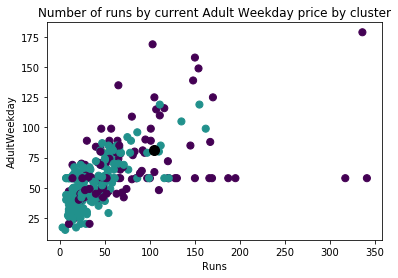

In [64]:
# Create useful plots to help tell the story
# Runs x Weekday Price
plt.scatter(df3['Runs'], df3['AdultWeekday'], c=df3['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(bm['Runs'], bm['AdultWeekday'], c='black', s=100)
plt.xlabel('Runs')
plt.ylabel('AdultWeekday')
plt.title('Number of runs by current Adult Weekday price by cluster')
plt.savefig('figures/RunsxWeekday.png',bbox_inches='tight')

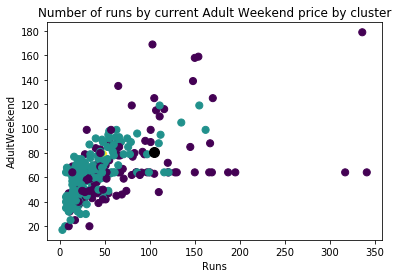

In [65]:
# Runs x Weekend Price
plt.scatter(df3['Runs'], df3['AdultWeekend'], c=df3['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(bm['Runs'], bm['AdultWeekend'], c='black', s=100)
plt.xlabel('Runs')
plt.ylabel('AdultWeekend')
plt.title('Number of runs by current Adult Weekend price by cluster')
plt.savefig('figures/RunsxWeekend.png',bbox_inches='tight')

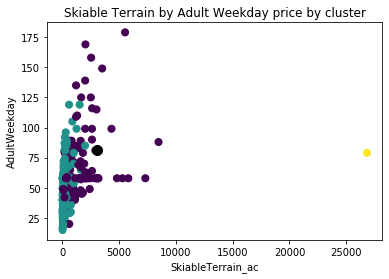

In [66]:
plt.scatter(df3['SkiableTerrain_ac'], df3['AdultWeekday'], c=df3['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(bm['SkiableTerrain_ac'], bm['AdultWeekday'], c='black', s=100)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('AdultWeekday')
plt.title('Skiable Terrain by Adult Weekday price by cluster')
plt.savefig('figures/TerrainxWeekday.png',bbox_inches='tight')

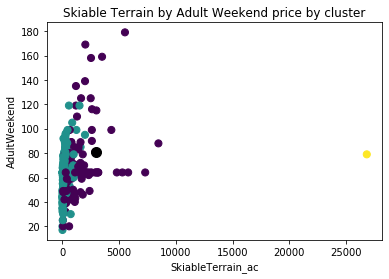

In [67]:
plt.scatter(df3['SkiableTerrain_ac'], df3['AdultWeekend'], c=df3['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(bm['SkiableTerrain_ac'], bm['AdultWeekend'], c='black', s=100)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('AdultWeekend')
plt.title('Skiable Terrain by Adult Weekend price by cluster')
plt.savefig('figures/TerrainxWeekend.png',bbox_inches='tight')

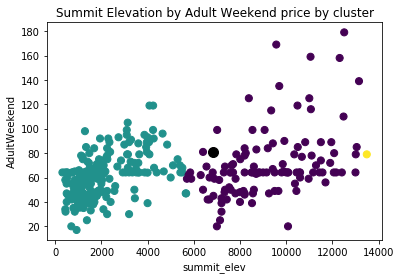

In [68]:
plt.scatter(df3['summit_elev'], df3['AdultWeekend'], c=df3['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(bm['summit_elev'], bm['AdultWeekend'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('AdultWeekend')
plt.title('Summit Elevation by Adult Weekend price by cluster')
plt.savefig('figures/SummitxWeekend.png',bbox_inches='tight')

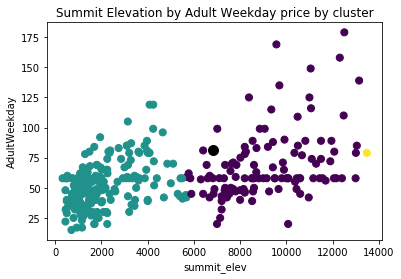

In [69]:
plt.scatter(df3['summit_elev'], df3['AdultWeekday'], c=df3['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(bm['summit_elev'], bm['AdultWeekday'], c='black', s=100)
plt.xlabel('summit_elev')
plt.ylabel('AdultWeekday')
plt.title('Summit Elevation by Adult Weekday price by cluster')
plt.savefig('figures/SummitxWeekday.png',bbox_inches='tight')

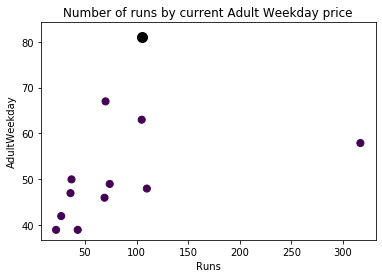

In [70]:
# Create a datafile with just Montanaa resorts to plot
montana = df3.loc[df3.state=='Montana']
plt.scatter(montana['Runs'], montana['AdultWeekday'], c=montana['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(bm['Runs'], bm['AdultWeekday'], c='black', s=100)
plt.xlabel('Runs')
plt.ylabel('AdultWeekday')
plt.title('Number of runs by current Adult Weekday price')
plt.savefig('figures/M.RunsxWeekday.png',bbox_inches='tight')

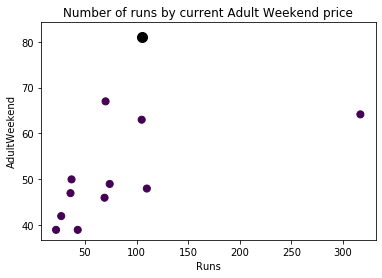

In [71]:
plt.scatter(montana['Runs'], montana['AdultWeekend'], c=montana['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(bm['Runs'], bm['AdultWeekend'], c='black', s=100)
plt.xlabel('Runs')
plt.ylabel('AdultWeekend')
plt.title('Number of runs by current Adult Weekend price')
plt.savefig('figures/M.RunsxWeekend.png',bbox_inches='tight')

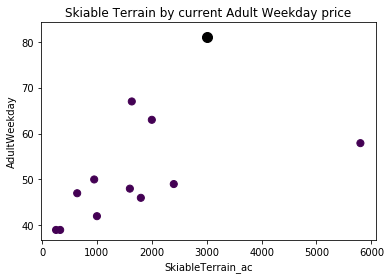

In [72]:
plt.scatter(montana['SkiableTerrain_ac'], montana['AdultWeekday'], c=montana['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(bm['SkiableTerrain_ac'], bm['AdultWeekday'], c='black', s=100)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('AdultWeekday')
plt.title('Skiable Terrain by current Adult Weekday price')
plt.savefig('figures/M.TerrainxWeekday.png',bbox_inches='tight')

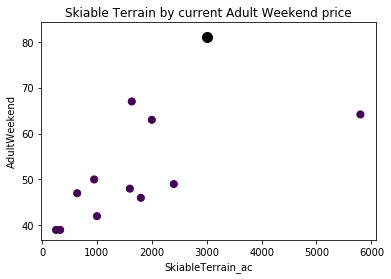

In [73]:
plt.scatter(montana['SkiableTerrain_ac'], montana['AdultWeekend'], c=montana['clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(bm['SkiableTerrain_ac'], bm['AdultWeekend'], c='black', s=100)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('AdultWeekend')
plt.title('Skiable Terrain by current Adult Weekend price')
plt.savefig('figures/M.TerrainxWeekend.png',bbox_inches='tight')

### Finalize Code - export to pickle

In [74]:
import pickle
s = pickle.dumps(model3d)
from joblib import dump, load
dump(model3d, 'models/regression_model3d_adultweekday.joblib')

['models/regression_model3d_adultweekday.joblib']

In [75]:
se = pickle.dumps(model3e)
#from joblib import dump, load
dump(model3e, 'models/regression_model3e_adultweekend.joblib')

['models/regression_model3e_adultweekend.joblib']

###  Finalize Documentation

In [76]:
# Create dataframe of coefficient results for this model
resultE = pd.DataFrame(abs(lm3e.coef_), X3e.columns, columns=['Final'])
coefficientsE = resultE.T
coefficientsE.index.name = "Model"
coefficientsE.head()

,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,projectedDaysOpen,NightSkiing_ac,clusters
Model,,,,,,,,,,,,,,,,,,,,,
Final,2.011784,0.250787,0.046878,0.458631,0.764527,1.116086,1.380078,0.249162,1.220622,0.599962,...,0.320199,0.995188,0.399253,1.241385,0.270175,0.689449,20.04907,0.661712,0.466445,2.622573


In [77]:
# Create dataframe of coefficient results for this model
resultD = pd.DataFrame(abs(lm3d.coef_), X3d.columns, columns=['Final'])
coefficientsD = resultD.T
coefficientsD.index.name = "Model"
coefficientsD.head()

,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters
Model,,,,,,,,,,,,,,,,,,,,,
Final,0.242749,0.391818,0.561571,0.985611,0.260283,0.542174,0.870871,0.140824,0.816049,0.372697,...,0.206413,0.836781,1.742646,1.08651,0.387398,1.262723,20.900254,1.033873,0.804383,2.29756


In [78]:
#Create dataframe of model perforamance metrics for this model
performanceE = pd.DataFrame({"ESV": explained_variance_score(y3e_test, y3e_pred), "MAE":mean_absolute_error(y3e_test, y3e_pred)}, index=['Final'])
performanceE.index.name = "Model"
performanceE.head()

,ESV,MAE
Model,,
Final,0.936169,5.106796


In [79]:
#Create dataframe of model perforamance metrics for this model
performanceD = pd.DataFrame({"ESV": explained_variance_score(y3d_test, y3d_pred), "MAE":mean_absolute_error(y3d_test, y3d_pred)}, index=['Final'])
performanceD.index.name = "Model"
performanceD.head()

,ESV,MAE
Model,,
Final,0.918507,5.531549


In [80]:
#Merge the coefficients and performance metrics into a single dataframe
MountainModelE = pd.concat([coefficientsE, performanceE], axis=1)
MountainModelE.head()

,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,...,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,projectedDaysOpen,NightSkiing_ac,clusters,ESV,MAE
Model,,,,,,,,,,,,,,,,,,,,,
Final,2.011784,0.250787,0.046878,0.458631,0.764527,1.116086,1.380078,0.249162,1.220622,0.599962,...,0.399253,1.241385,0.270175,0.689449,20.04907,0.661712,0.466445,2.622573,0.936169,5.106796


In [81]:
#Merge the coefficients and performance metrics into a single dataframe
MountainModelD = pd.concat([coefficientsD, performanceD], axis=1)
MountainModelD.head()

,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,...,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac,clusters,ESV,MAE
Model,,,,,,,,,,,,,,,,,,,,,
Final,0.242749,0.391818,0.561571,0.985611,0.260283,0.542174,0.870871,0.140824,0.816049,0.372697,...,1.742646,1.08651,0.387398,1.262723,20.900254,1.033873,0.804383,2.29756,0.918507,5.531549


In [82]:
# Export data to final csv
MountainModelD.to_csv("models/WeekdayMountainModelMetrics.csv", index=True)
MountainModelE.to_csv("models/WeekendMountainModelMetrics.csv", index=True)